Tugas 2 Pengolahan Citra


Face detection

In [3]:
#Face detection using OpenCV
#menggunakan metode haar cascade

#Codenya
import cv2
import sys

def HaarCasCade_FD(image, lebar, panjang):

    # # Get user supplied values
    # imagePath =sys.argv[0]

    # Load the Haar Cascade 
    casPath = 'haarcasecade.xml'
    
    # Create the Haar Cascade
    faceCascade = cv2.CascadeClassifier(casPath)

    # Read the image
    image = cv2.imread(image)

    # Convert to Gray-Scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect Faces in the Image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(32, 24)
    )

    print("Found {0} faces!".format(len(faces)))

    # Draw a rectangle around the Faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # Resize
    image = cv2.resize(image, (lebar,panjang))

    # image = cv.resize(image, (400,600))
    cv2.imshow('Faces found', image)
    cv2.waitKey(0)
    
HaarCasCade_FD('Foto/Afkar.jpeg', 400, 400)




error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [ ]:
#menggunakan metode lain (masukkan namanya disini)

Filtering

In [5]:
#filtering 1
#Sharpening
import cv2
import numpy as np

image = cv2.imread('Foto/AripKent.jpeg')
cv2.imshow('Original', image)

kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
imgsharpen = cv2.filter2D(image, -1, kernel)
cv2.imshow('Sharpening', imgsharpen)
cv2.imwrite('Hasil/AripKent_sharpening.jpeg', imgsharpen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#filtering 2
#gaussian blur
import cv2
image = cv2.imread('Foto/Firman2.jpeg')
cv2.imshow('Original', image)
imggaussian = cv2.GaussianBlur(image, (5,5), 0)
cv2.imshow('Gaussian Blur', imggaussian)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
#filtering 3
#median blur
import cv2
image = cv2.imread('Foto/Firman2.jpeg')
cv2.imshow('Original', image)
imgMedian = cv2.medianBlur(image,7)
cv2.imshow('median Blur', imgMedian)
cv2.waitKey()
cv2.destroyAllWindows()

Segmentasi

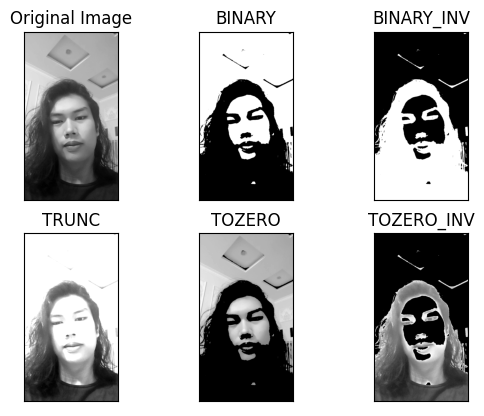

True

In [4]:
#segmentasi 1
#Thresholding method
from turtle import title
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('foto/Faqih.jpeg')
#mengubah citra menjadi grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)


ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #menggunakan threshold binary
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #menggunakan threshold binary inverse
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) #menggunakan threshold trunc
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) #menggunakan threshold tozero
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) #menggunakan threshold tozero inverse

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]



for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()
cv2.imwrite('hasil/hasil segmentasi Binary.jpeg', thresh1)
cv2.imwrite('hasil/hasil segmentasi Binary inverse.jpeg', thresh2)
cv2.imwrite('hasil/hasil segmentasi Trunc.jpeg', thresh3)
cv2.imwrite('hasil/hasil segmentasi Tozero.jpeg', thresh4)
cv2.imwrite('hasil/hasil segmentasi Tozero inverse.jpeg', thresh5)

    

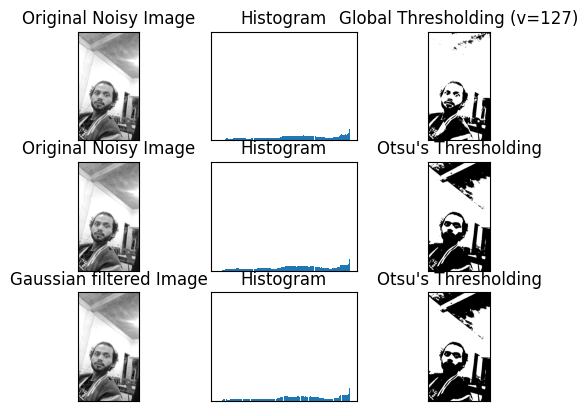

In [23]:
#segmentasi 2
#Otsu's thresholding
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('foto/Afkar.jpeg',0)
 
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()